In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [6]:
data['Posted On']=pd.to_datetime(data['Posted On'])
data['Posted On'].sort_values()

1222   2022-04-13
244    2022-04-23
418    2022-04-23
303    2022-04-23
413    2022-04-23
          ...    
4368   2022-07-10
4126   2022-07-10
4546   2022-07-10
3743   2022-07-10
3552   2022-07-11
Name: Posted On, Length: 4746, dtype: datetime64[ns]

In [7]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### No Missing Values

In [8]:
num_col= data[data.columns].select_dtypes('number').columns
num_col


Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [9]:
data[num_col]

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [10]:
contin_col=[feature for feature in num_col if len(data[feature].unique())>=25 ]
discrete_col=[feature for feature in num_col if len(data[feature].unique())<25 ]

In [11]:
data['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

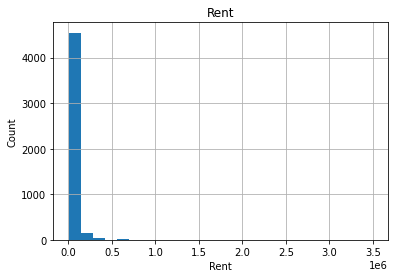

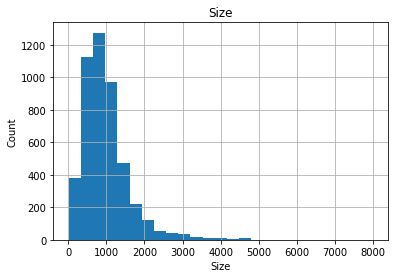

In [12]:
for feature in contin_col:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

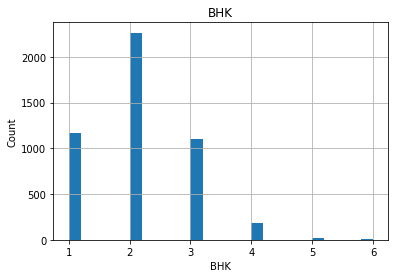

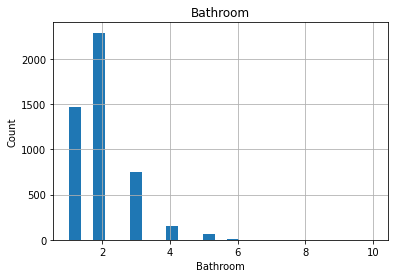

In [13]:
for feature in discrete_col:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

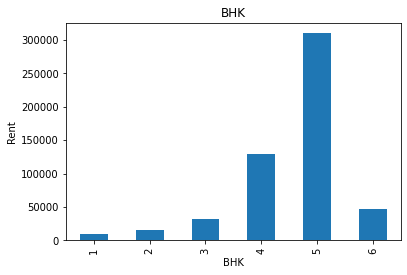

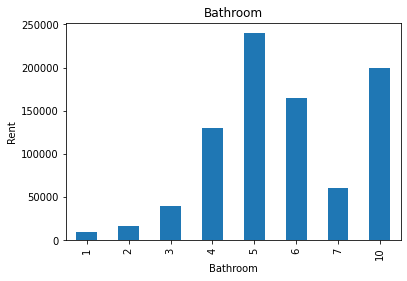

In [14]:
for feature in discrete_col:
    data.groupby(feature)['Rent'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rent')
    plt.title(feature)
    plt.show()

In [15]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Floor and number of categories are 480
The feature is Area Type and number of categories are 3
The feature is Area Locality and number of categories are 2235
The feature is City and number of categories are 6
The feature is Furnishing Status and number of categories are 3
The feature is Tenant Preferred and number of categories are 3
The feature is Point of Contact and number of categories are 3


In [17]:
# for feature in categorical_features:
#     data.groupby(feature)['Rent'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('Rent')
#     plt.title(feature)
#     plt.show()

In [18]:
data[categorical_features]

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [19]:
data['Floor_no']=data['Floor'].str.split(' out of').str[0]
data['Total_floor']=data['Floor'].str.split(' out of').str[1]

In [20]:
data['Floor_no'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

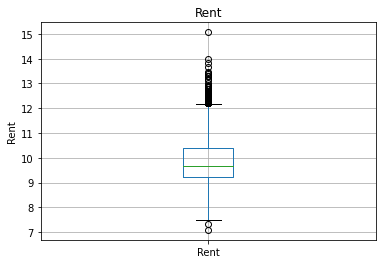

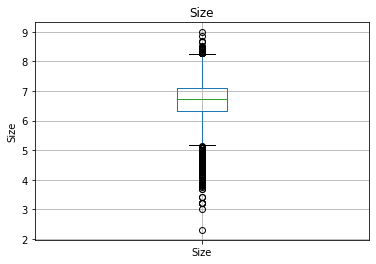

In [21]:
for feature in contin_col:
    datas=data.copy()
    if 0 in datas[feature].unique():
        pass
    else:
        datas[feature]=np.log(datas[feature])
        datas.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [22]:
data['Rent']=np.log(data['Rent'])

In [23]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact',
 'Floor_no',
 'Total_floor']

In [24]:
q1=data['Rent'].quantile(0.25)
q3=data['Rent'].quantile(0.75)
iqr=q3-q1
print(iqr,q1,q3)
data[(data['Rent']<q1-1.5*iqr) | (data['Rent']>q3+1.5*iqr)].count()/data.count()

1.193922468472433 9.210340371976184 10.404262840448617


Posted On            0.024442
BHK                  0.024442
Rent                 0.024442
Size                 0.024442
Floor                0.024442
Area Type            0.024442
Area Locality        0.024442
City                 0.024442
Furnishing Status    0.024442
Tenant Preferred     0.024442
Bathroom             0.024442
Point of Contact     0.024442
Floor_no             0.024442
Total_floor          0.024462
dtype: float64

In [25]:
# data.drop(data[(data['Rent']<q1-1.5*iqr) | (data['Rent']>q3+1.5*iqr)].index,inplace=True)

In [26]:
data[data['Floor_no'].isin(['Ground','Upper Basement','Lower Basement'])].groupby('Floor_no')['Rent'].mean()

Floor_no
Ground             9.414248
Lower Basement     9.976036
Upper Basement    10.388838
Name: Rent, dtype: float64

In [27]:

pd.get_dummies(data,columns=['Floor_no'])

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,...,Floor_no_6,Floor_no_60,Floor_no_65,Floor_no_7,Floor_no_76,Floor_no_8,Floor_no_9,Floor_no_Ground,Floor_no_Lower Basement,Floor_no_Upper Basement
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,...,0,0,0,0,0,0,0,1,0,0
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,9.615805,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
4742,2022-05-15,3,10.275051,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
4743,2022-07-10,3,10.463103,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,...,0,0,0,0,0,0,0,0,0,0
4744,2022-07-06,3,10.714418,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# data['Ground_floor']=np.where(data['Floor_no']=='Ground',1,0)
# data['Lower_Basement']=np.where(data['Floor_no']=='Lower Basement',1,0)

In [29]:
#data[data['Floor_no']=='Lower Basement']['Lower_Basement']
data_cl=data.copy()

In [30]:
 data_cl.loc[data_cl['Floor_no'].isin(['Lower Basement','Ground','Upper Basement']),'Floor_no']=0
data_cl


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_no,Total_floor
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,9.615805,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,2022-05-15,3,10.275051,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,2022-07-10,3,10.463103,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,2022-07-06,3,10.714418,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [31]:
data_cl['Floor_no']=data_cl['Floor_no'].astype('int')

In [32]:
print(num_col)
print(data_cl.columns)

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')
Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Floor_no', 'Total_floor'],
      dtype='object')


In [33]:
data_cl[data_cl['Total_floor'].isnull()]['Floor']

2553         3
2883    Ground
4490         1
4560         1
Name: Floor, dtype: object

#### handling missing values from feature creation

In [34]:

data_cl['Total_floor'].fillna(int(data_cl['Total_floor'].mode()),inplace=True)
data_cl.loc[data_cl['Total_floor'].isnull(),'Total_floor']=4
data_cl.isnull().sum()



Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Floor_no             0
Total_floor          0
dtype: int64

In [35]:
data_cl['Floor_no']=data_cl['Floor_no'].astype('int')
data_cl['Total_floor']=data_cl['Total_floor'].astype('int')

In [36]:
data_cl.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_no,Total_floor
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [37]:
data_cl.groupby('Area Type')['Rent'].mean()
data_cl['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

#### I'm using mean encoding for area locality as there is high cardinality for this column

In [38]:
data_fc=data_cl.copy()

In [39]:
data_fc['Area Locality'].value_counts()==1


Bandra West                                False
Gachibowli                                 False
Electronic City                            False
Velachery                                  False
Miyapur, NH 9                              False
                                           ...  
Kengeri Upanagara                           True
Ittamadu, Banashankari, Outer Ring Road     True
Rmv Extension, Armane Nagar                 True
snv la                                      True
Manikonda, Hyderabad                        True
Name: Area Locality, Length: 2235, dtype: bool

In [40]:
single_area=list((data_fc['Area Locality'].value_counts()<=1).index)
data_fc[data_fc['Area Locality'].isin(single_area)]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_no,Total_floor
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,9.615805,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,2022-05-15,3,10.275051,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,2022-07-10,3,10.463103,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,2022-07-06,3,10.714418,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [41]:
city_col=data_fc['City']
data_fc=pd.get_dummies(data=data_cl,drop_first=True,columns=['City'])
data_fc.drop(columns=['Posted On','Floor','Point of Contact','Furnishing Status','Tenant Preferred','Area Type'],inplace=True)
data_fc['City']=city_col

In [42]:
X=data_fc
y=data_fc.Rent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [43]:
data_train=X_train.copy()
data_train['Rent']=y_train

In [44]:
# k=data_fc['Area Locality'].value_counts().to_dict()
# X_test.drop(X_test[X_test['Area Locality'].map(k)==1].index,inplace=True )
# X_train=pd.concat([X_test[X_test['Area Locality'].map(k)==1],X_train])
# X_train=X_train.reset_index()

In [45]:
k=list(set(X_test['Area Locality'].unique())-set(X_train['Area Locality'].unique()))
X_test.drop(X_test[X_test['Area Locality'].isin(k)].index,inplace=True )
X_train=pd.concat([X_test[X_test['Area Locality'].isin(k)],X_train])
X_train=X_train.reset_index()

In [46]:

list(set(X_test['Area Locality'].unique())-set(X_train['Area Locality'].unique()))

[]

In [47]:
set(X_train.columns)-set(X_test.columns)

{'index'}

In [48]:
#rea_locality['Bandel']


#### Target guided ordinal encoding for every city

In [49]:
area=data_train['City'].unique()
final={}
for feature in area:
    area_locality_map=data_train[data_train['City']==feature].groupby(['Area Locality'])['Rent'].mean().sort_values().index
    area_locality={i:k for k,i in enumerate(area_locality_map,0)}
    final.update(area_locality)
X_train['Area Locality']=X_train['Area Locality'].map(final)
X_test['Area Locality']=X_test['Area Locality'].map(final)

# X_train   
final

{'Ragavendra Nagar': 0,
 'Madanayakahalli': 1,
 'Nelamangala': 2,
 'Peenya Industrial Area, Tumkur Road': 3,
 'Virat Nagar, Bommanahalli': 4,
 'Byatarayanapura': 5,
 'Kadabagere': 6,
 'HMT Layout Nagasandra': 7,
 'Vaderahalli': 8,
 'Bydara Halli, Benson Town': 9,
 'Chamundi Nagar, Rajajinagar': 10,
 'Peenya 2nd Stage': 11,
 'Kengeri Hobli': 12,
 'Hesaraghatta Main Road': 13,
 'Parappana Agrahara': 14,
 'Doddanagamangala': 15,
 'Mangammanapalya, Hosur Road': 16,
 'Lakshmipura': 17,
 'Immadihalli, Whitefield': 18,
 'Vyalikaval, Malleshwaram': 19,
 'Kasturi Nagar': 20,
 'Jnana Ganga Nagar': 21,
 'Ragavendra Industrial Estate': 22,
 'Ullal Upnagar': 23,
 'Thammenahalli Apartmentge': 24,
 'Doddabidarakallu': 25,
 'Nagarbhavi': 26,
 'T Dasarahalli': 27,
 'Sunkadakatte': 28,
 'Nimbekaipura': 29,
 'Rukmini Nagar': 30,
 'Garden City University': 31,
 'Aduru': 32,
 'Subhash Nagar, Kengeri Satellite Town': 33,
 'Chikkabanavara': 34,
 'Gunjur': 35,
 'Mailasandar': 36,
 'Konappana Agrahara, Electro

In [50]:
import json

# Serialize data into file:
json.dump( final, open( "area_loc.json", 'w' ) )

#### Target guided ordinal encoding for all cities

In [51]:

# area_locality_map=data_train.groupby(['Area Locality'])['Rent'].mean().sort_values().index
# area_locality={i:k for k,i in enumerate(area_locality_map,0)}
# X_train['Area Locality']=X_train['Area Locality'].map(area_locality)
# X_test['Area Locality']=X_test['Area Locality'].map(area_locality)
# X_train

#### Target guided mean encoding

In [52]:
# area_locality_map=data_train.groupby('Area Locality')['Rent'].mean().to_dict()
# X_train['Area Locality']=X_train['Area Locality'].map(area_locality_map)
# X_test['Area Locality']=X_test['Area Locality'].map(area_locality_map)
# X_train

In [53]:
X_test

,BHK,Rent,Size,Area Locality,Bathroom,Floor_no,Total_floor,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City
230,1,9.798127,700,214,1,0,4,0,0,0,1,0,Kolkata
3277,2,9.680344,800,131,2,1,3,1,0,0,0,0,Chennai
1561,2,9.159047,530,5,1,1,3,0,0,0,0,0,Bangalore
1897,1,9.104980,500,320,1,0,4,0,0,0,0,0,Bangalore
1989,1,9.510445,450,26,1,0,4,0,0,0,0,0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,1,9.104980,600,266,1,2,4,0,0,0,0,0,Bangalore
4496,2,9.798127,990,238,2,3,3,0,0,1,0,0,Hyderabad
3518,3,11.608236,1435,224,3,5,15,1,0,0,0,0,Chennai
2101,1,9.047821,730,159,1,2,4,0,0,0,0,0,Bangalore


In [54]:
(X_test['Area Locality'].value_counts()==1).sum()

117

In [55]:
y_train=X_train['Rent']
y_test=X_test['Rent']
X_train.drop(columns=['index','Rent','City'],inplace=True)
X_test.drop(columns=['Rent','City'],inplace=True)

In [56]:
# y_train=X_train['Rent']
# y_test=X_test['Rent']
# X_train.drop(columns=['Rent','City'],inplace=True)
# X_test.drop(columns=['Rent','City'],inplace=True)

In [57]:
data_fc

,BHK,Rent,Size,Area Locality,Bathroom,Floor_no,Total_floor,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City
0,2,9.210340,1100,Bandel,2,0,2,0,0,0,1,0,Kolkata
1,2,9.903488,800,"Phool Bagan, Kankurgachi",1,1,3,0,0,0,1,0,Kolkata
2,2,9.740969,1000,Salt Lake City Sector 2,1,1,3,0,0,0,1,0,Kolkata
3,2,9.210340,800,Dumdum Park,1,1,2,0,0,0,1,0,Kolkata
4,2,8.922658,850,South Dum Dum,1,1,2,0,0,0,1,0,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,9.615805,1000,Bandam Kommu,2,3,5,0,0,1,0,0,Hyderabad
4742,3,10.275051,2000,"Manikonda, Hyderabad",3,1,4,0,0,1,0,0,Hyderabad
4743,3,10.463103,1750,"Himayath Nagar, NH 7",3,3,5,0,0,1,0,0,Hyderabad
4744,3,10.714418,1500,Gachibowli,2,23,34,0,0,1,0,0,Hyderabad


In [58]:

X_test['Area Locality'].value_counts()

224    11
193    10
137    10
284     9
95      9
       ..
471     1
217     1
114     1
17      1
130     1
Name: Area Locality, Length: 265, dtype: int64

In [59]:
print(data.columns,X_train.columns)

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Floor_no', 'Total_floor'],
      dtype='object') Index(['BHK', 'Size', 'Area Locality', 'Bathroom', 'Floor_no', 'Total_floor',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai'],
      dtype='object')


In [60]:
X_test.isnull().sum()

BHK               0
Size              0
Area Locality     0
Bathroom          0
Floor_no          0
Total_floor       0
City_Chennai      0
City_Delhi        0
City_Hyderabad    0
City_Kolkata      0
City_Mumbai       0
dtype: int64

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [62]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [63]:
# import xgboost
# from xgboost import XGBRegressor
# model = XGBRegressor()
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# model.fit(X_train, y_train)

In [64]:
# Get numerical feature importances
feature_list=list(X_train.columns)
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Area Locality        Importance: 0.71
Variable: Size                 Importance: 0.08
Variable: City_Mumbai          Importance: 0.08
Variable: BHK                  Importance: 0.04
Variable: Bathroom             Importance: 0.04
Variable: Total_floor          Importance: 0.02
Variable: City_Delhi           Importance: 0.02
Variable: Floor_no             Importance: 0.01
Variable: City_Chennai         Importance: 0.0
Variable: City_Hyderabad       Importance: 0.0
Variable: City_Kolkata         Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None]

In [65]:
from numpy import mean
from numpy import std
scores = cross_val_score(model, X_train,y_train,scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.910 (0.024)


array([0.90409842, 0.92468014, 0.90264177, 0.93810372, 0.91851362,
       0.89836863, 0.93174603, 0.91623038, 0.84942773, 0.91946881])

In [66]:
# from sklearn.model_selection import GridSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# hyper_params = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# model_cv = GridSearchCV(estimator = model, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         cv = cv, 
#                         verbose = 1,
#                         return_train_score=True)      

# # fit the model
# model_cv.fit(X_train, y_train)    

In [67]:
X_train

,BHK,Size,Area Locality,Bathroom,Floor_no,Total_floor,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,700,136,1,0,2,0,0,0,0,0
1,3,1233,388,4,35,68,0,0,0,0,1
2,3,1600,163,3,1,2,0,0,1,0,0
3,1,600,28,1,2,3,0,0,0,0,0
4,1,70,38,1,1,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3791,1,450,47,1,1,3,0,1,0,0,0
3792,1,545,115,1,2,3,0,1,0,0,0
3793,3,806,253,2,2,4,0,0,0,0,1
3794,2,1600,105,3,1,2,0,0,1,0,0


In [68]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)
err_dist=abs(np.exp(predictions) - np.exp(y_test))
errors = abs(np.exp(predictions) - np.exp(y_test))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 13583.13 degrees.


In [69]:
err_dist.sort_values()

2361    2.820163e+00
2245    1.237186e+01
2776    2.111115e+01
3318    2.567214e+01
2961    2.962995e+01
            ...     
3639    1.497032e+05
2869    1.587077e+05
589     2.395103e+05
2750    3.696480e+05
1837    3.436483e+06
Name: Rent, Length: 633, dtype: float64

In [70]:
data_test=X_test.copy()
data_test['Rent']=y_test
data_test['predict']=predictions
data_test.loc[err_dist[err_dist>np.log(5000)].index].drop(columns='City_Chennai').loc[data_test['City_Mumbai']==1]

,BHK,Size,Area Locality,Bathroom,Floor_no,Total_floor,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Rent,predict
1230,2,1000,445,2,10,13,0,0,0,1,11.775290,11.730153
998,2,900,279,2,10,15,0,0,0,1,11.225243,10.915269
1078,2,777,372,2,17,22,0,0,0,1,11.225243,11.334180
644,1,300,396,1,4,6,0,0,0,1,9.798127,10.857579
1016,2,710,301,2,13,18,0,0,0,1,10.691945,10.878708
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2,800,271,2,10,14,0,0,0,1,11.082143,10.924945
1113,3,1100,483,3,6,15,0,0,0,1,12.100712,11.840419
1364,1,475,213,1,3,4,0,0,0,1,10.373491,10.400186
794,1,225,143,1,18,25,0,0,0,1,9.852194,9.921350


In [71]:
k=list(X_train.columns)

s=str(k)
s.replace("'",'')
inpu=np.array([2,800,445,2,1,5,0,0,0,1])
inpu=np.reshape(10,1)
np.exp(model.predict([X_test.iloc[0]]))


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([15827.05507108])

count    6.330000e+02
mean     1.358313e+04
std      1.382021e+05
min      2.820163e+00
25%      1.360458e+03
50%      3.251889e+03
75%      6.978987e+03
max      3.436483e+06
Name: Rent, dtype: float64


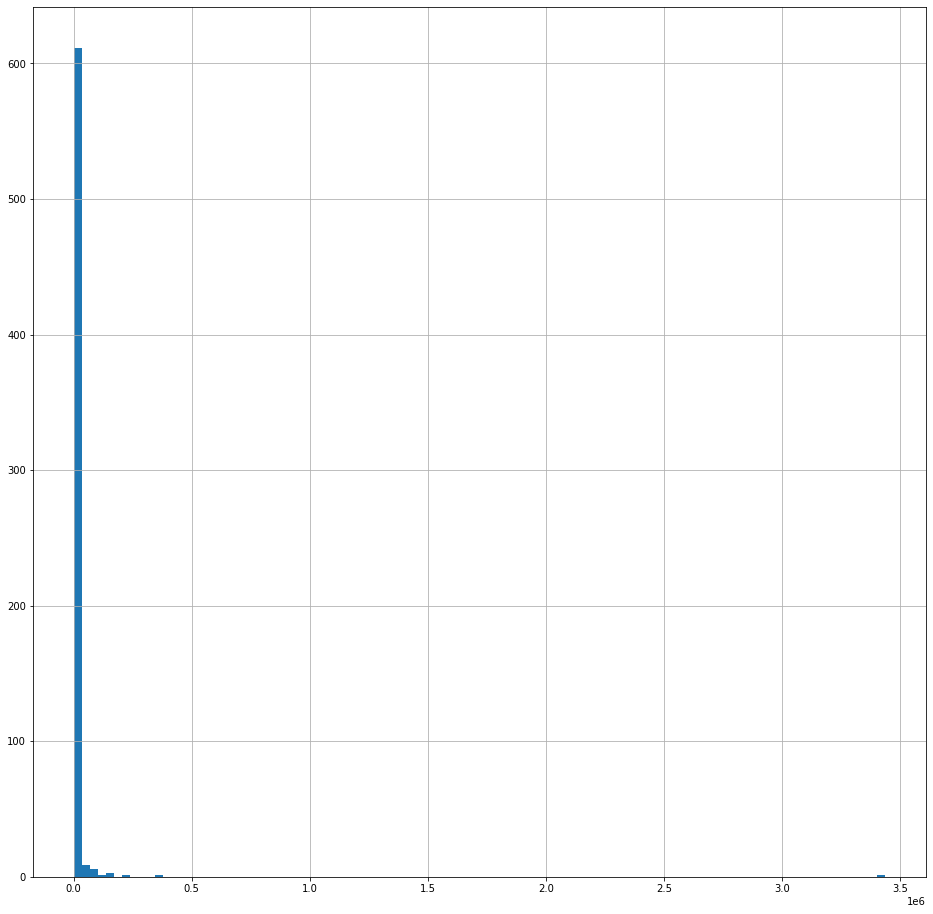

In [72]:
plt.figure(figsize=(16, 16))
err_dist.hist(bins=100)
print(err_dist.describe())

In [73]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.exp(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.65 %.


In [74]:
import pickle
filename = 'finalized_model.pkl'
with open(filename,'wb') as f:
    pickle.dump(model,f)
    


In [75]:

z=data.groupby("City")["Area Locality"].unique().to_dict()
z


{'Bangalore': array(['Talagatta Pura', 'Nagappa Reddy layout-Dooravani Nagar',
        'Kattigenahalli, Bellary Road', 'C V Raman Nagar',
        'Chikkalasandra, Bangalore', 'Talaghattapura', 'Malleshwaram',
        'Ramaiah Layout, Kacharakanahalli', 'Rajajinagar',
        'Padmanabha Nagar', 'Kengeri Main Road', 'Ramamurthy Nagar',
        'Thanisandra', 'J P Nagar', 'Bannerghatta Main Road',
        'Vinayakanagar, Hebbal', 'venkatapuram', 'Vv Nagar, Bikasipura',
        'Kacharakanahalli', 'Tumkur Road', 'Babusahib Palya',
        'Kumaraswamy Layout, Kumaraswamy Layout', 'Nri Layout',
        'Balaji Layout -Hongasandra, Hongasandra', 'Vijaya Bank Layout',
        'Jaya Nagar Block 1, Jayanagar', 'Maruthi Sevanagar',
        'Nelamangala', 'Yelahanka New Town', 'Hongasandra', 'Girinagar',
        'T Dasarahalli', 'Jogupalya', 'Balaji Gardens Layout, Gottigere',
        'in Bannerghatta Road', 'Electronic City Phase 2, Electronic City',
        'Hebbal', 'Jalahalli East',
        